# Customer Churn Analysis

## Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

## Importing the required libraries:

In [1]:
#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import matplotlib.pyplot as plt 
import seaborn as sns

#for model building
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

#for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#checking shape
df.shape

(7043, 21)

We have **7043** rows and **21** columns including target variable.

In [4]:
#checking columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Churn is our target column.

In [5]:
#checking Data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#lets check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in this dataset

## Lets check the number of unique values in object column

In [7]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

customerID 7043
gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
TotalCharges 6531
Churn 2


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Male      3555
Female    3488
Name: gender, dtype: int64


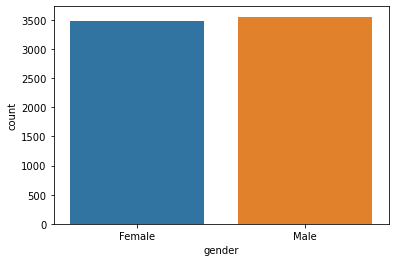

In [9]:
#Using countplot for nominal data
sns.countplot(x='gender', data=df)
print(df['gender'].value_counts())

The number of Male and Female customers are almsot equal

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


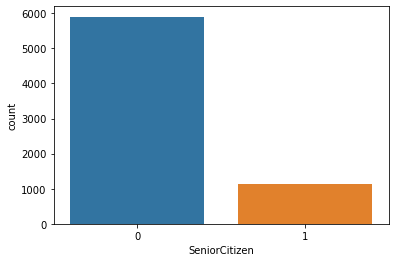

In [10]:
sns.countplot(x='SeniorCitizen', data=df)
print(df['SeniorCitizen'].value_counts())

1142 customers are senior citizens and 5901 are not senior citizens. 

No     3641
Yes    3402
Name: Partner, dtype: int64


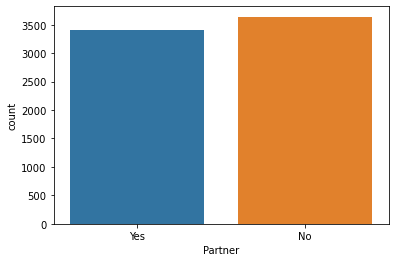

In [11]:
sns.countplot(x='Partner', data=df)
print(df['Partner'].value_counts())

Around 3402 customers have a partner and 3641 customers do not have a partner.

No     4933
Yes    2110
Name: Dependents, dtype: int64


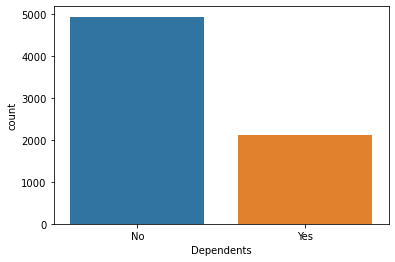

In [12]:
sns.countplot(x='Dependents', data=df)
print(df['Dependents'].value_counts())

4933 customers do not have any dependents but only  2110 customers have dependents.

Yes    6361
No      682
Name: PhoneService, dtype: int64


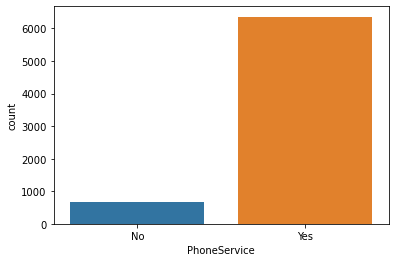

In [13]:
sns.countplot(x='PhoneService', data=df)
print(df['PhoneService'].value_counts())

682 customers do not have a phone service but 6361 customers have a phone service.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


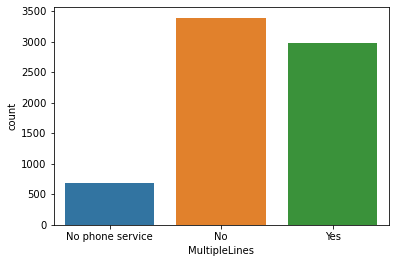

In [14]:
sns.countplot(x='MultipleLines', data=df)
print(df['MultipleLines'].value_counts())

Around 3390 customers do not have multiple line service, around 700 have no phone service but around 2971 customers have multiple line service.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


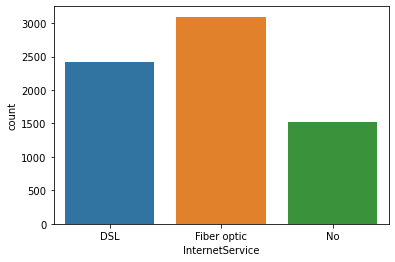

In [15]:
sns.countplot(x='InternetService', data=df)
print(df['InternetService'].value_counts())

3096 customers have fibre optic Internet Service, 2421 have DSL and 1526 have no Internet Service.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


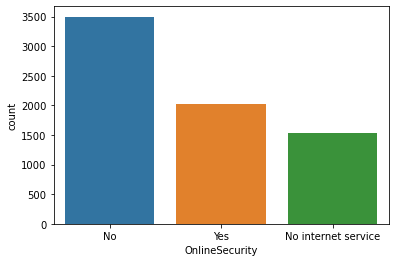

In [16]:
sns.countplot(x='OnlineSecurity', data=df)
print(df['OnlineSecurity'].value_counts())

3500 customers have no Online Security, 2000 have Online security and 1500 have no Internet Service.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


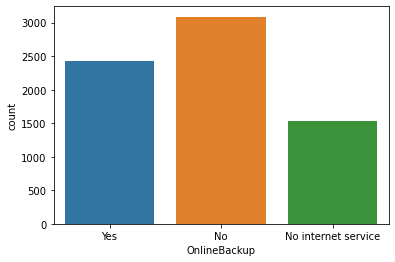

In [17]:
sns.countplot(x='OnlineBackup', data=df)
print(df['OnlineBackup'].value_counts())

2429 customers have online backup, 3088 have no Online Backup and 1526 have no Internet Service.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


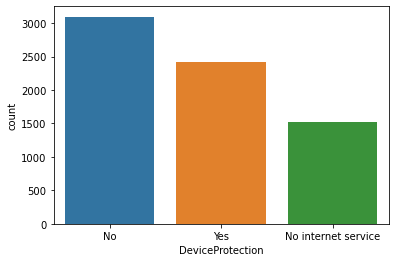

In [18]:
sns.countplot(x='DeviceProtection', data=df)
print(df['DeviceProtection'].value_counts())

3095 customers do noy have any Device Protection, 2422 have Device Protection and 1526 have no Internet Service.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


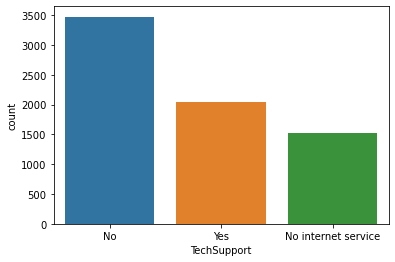

In [19]:
sns.countplot(x='TechSupport', data=df)
print(df['TechSupport'].value_counts())

3473 customers have no Tech Support, 2044 have Tech Support and 1526 have no Internet Service.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


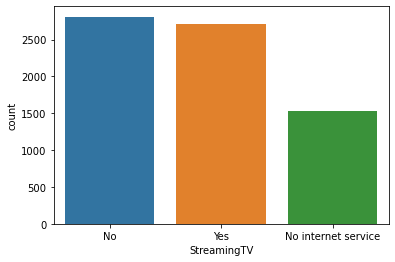

In [20]:
sns.countplot(x='StreamingTV', data=df)
print(df['StreamingTV'].value_counts())

2810 customers do not have Streaming TV, 2707 have Streaming TV and 1526 have no Internet Service.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


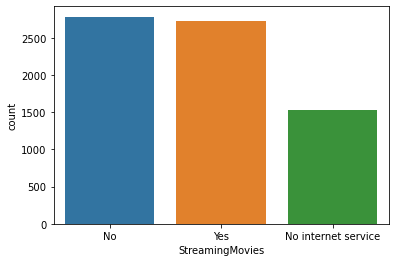

In [21]:
sns.countplot(x='StreamingMovies', data=df)
print(df['StreamingMovies'].value_counts())

2785 customers do not have Streaming Movies, 2732 have Streaming Movies and 1526 have no Internet Service.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


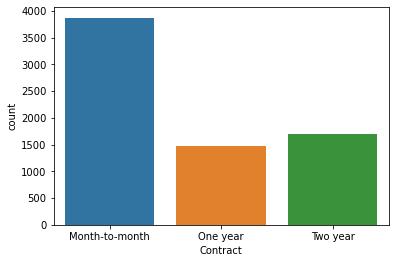

In [22]:
sns.countplot(x='Contract', data=df)
print(df['Contract'].value_counts())

3875 customers have a contract on month to month basis, 1695 have an yearly based contract and 1473 have contracts for 2 years

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


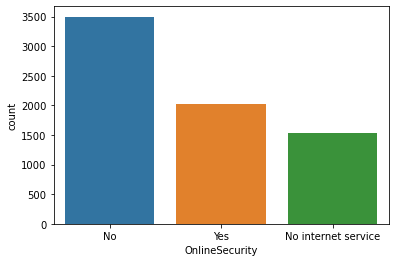

In [23]:
sns.countplot(x='OnlineSecurity', data=df)
print(df['OnlineSecurity'].value_counts())

3498 customers dont have online security and 2019 customers have online and doesnt have online security.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


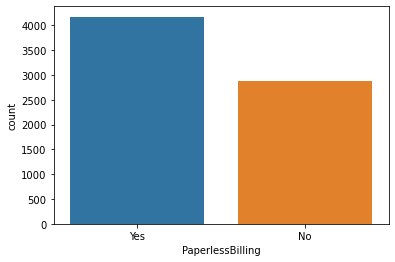

In [24]:
sns.countplot(x='PaperlessBilling', data=df)
print(df['PaperlessBilling'].value_counts())

4171 customers have a Paperless billing and only 2872 customers do not have a Paperless billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


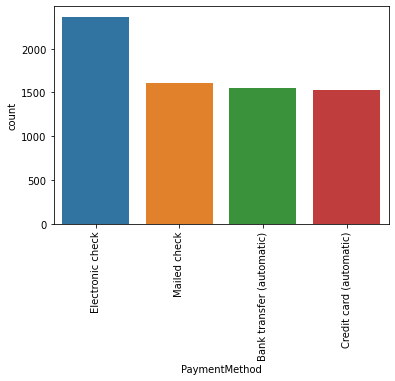

In [25]:
sns.countplot(x='PaymentMethod', data=df)
plt.xticks(rotation=90)
print(df['PaymentMethod'].value_counts())

2365 customers make Payments through electronic check and around 1612 customers make payments via Mail Check,1544 through Bank Transfer and 1522 through Credit Card each.

No     5174
Yes    1869
Name: Churn, dtype: int64


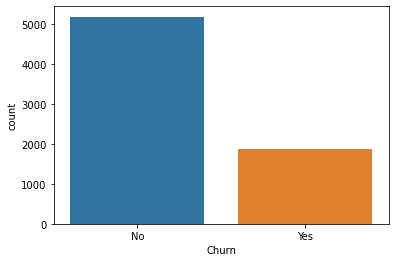

In [26]:
sns.countplot(x='Churn', data=df)
print(df['Churn'].value_counts())

5174 customer's churn is no, only 1869 customer's churn is Yes.

In [27]:
#lets check for empty spaces
df.TotalCharges.value_counts()

20.2      11
          11
19.75      9
20.05      8
19.9       8
          ..
3571.6     1
723.35     1
5817.7     1
573.05     1
4676.7     1
Name: TotalCharges, Length: 6531, dtype: int64

we can see 11 white spaces in this column

In [28]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [29]:
#lets replace white spaces with nan values
df.TotalCharges.replace(' ',np.nan,inplace=True)

In [30]:
#now we have 11 nan values
df.TotalCharges.isnull().sum()

11

In [31]:
#we can see that the data right skewed in this column, so lets replace it with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [32]:
#Lets convert this into float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

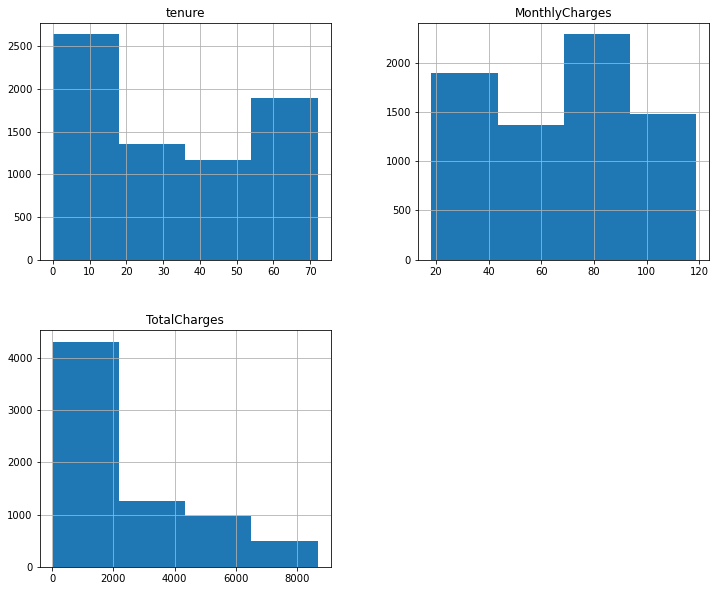

In [33]:
df.hist(column=['tenure','MonthlyCharges','TotalCharges'],bins=4, figsize=(12,10))

**Tenure:** Tenure between 0-20 there are lot of customers.

**MonthlyCharges:** Monthly charges bewteen 70-95 have more customers.

**TotalCharges:** Total charges between 0-2100 have more customers.

In [34]:
#Label encoding objects variables
from sklearn.preprocessing import LabelEncoder
cols = ['Churn'] 
label = LabelEncoder()
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

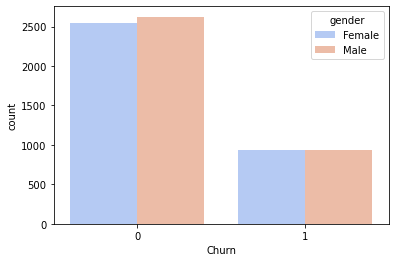

In [37]:
sns.countplot(df['Churn'], palette='coolwarm', hue='gender', data=df)
plt.show()

Both male and female churn is equal.

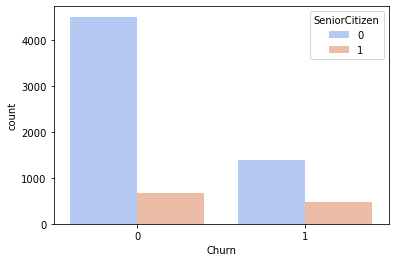

In [38]:
sns.countplot(df['Churn'], palette='coolwarm', hue='SeniorCitizen', data=df)
plt.show()

Senior citizen churn is low compared to others.

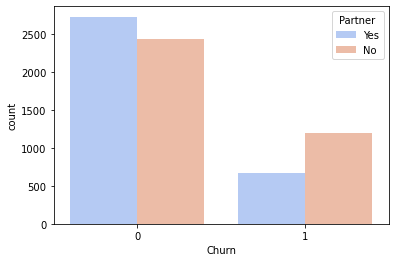

In [40]:
sns.countplot(df['Churn'], palette='coolwarm', hue='Partner', data=df)
plt.show()

Customers without partner have high churn.

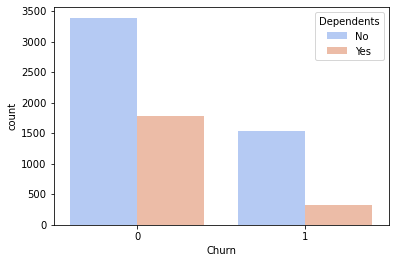

In [41]:
sns.countplot(df['Churn'], palette='coolwarm', hue='Dependents', data=df)
plt.show()

Customers with dependents have high churn.

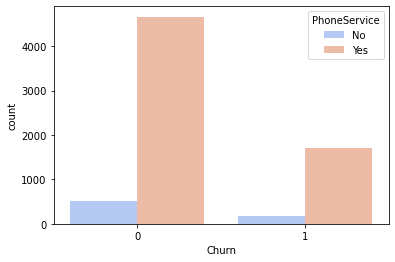

In [42]:
sns.countplot(df['Churn'], palette='coolwarm', hue='PhoneService', data=df)
plt.show()

Customers with phoneservice have high churn.

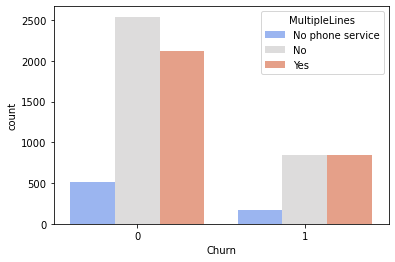

In [43]:
sns.countplot(df['Churn'], palette='coolwarm', hue='MultipleLines', data=df)
plt.show()

Customers with and without Multiplelines have high churn.

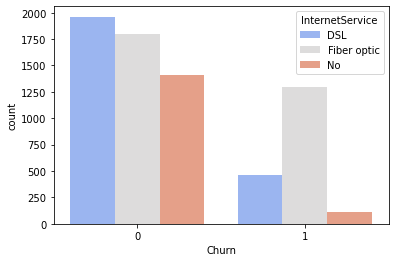

In [44]:
sns.countplot(df['Churn'], palette='coolwarm', hue='InternetService', data=df)
plt.show()

Customers with Fiber optic have high churn.

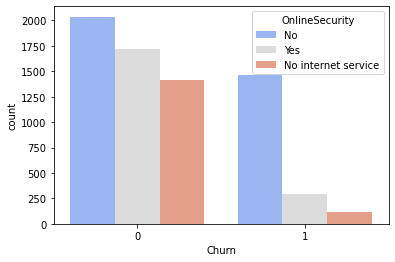

In [45]:
sns.countplot(df['Churn'], palette='coolwarm', hue='OnlineSecurity', data=df)
plt.show()

Customers with no online security have high churn.

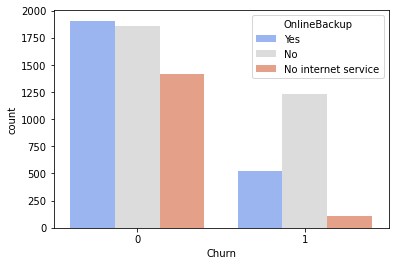

In [46]:
sns.countplot(df['Churn'], palette='coolwarm', hue='OnlineBackup', data=df)
plt.show()

Customers with no onlinebackup have high churn.

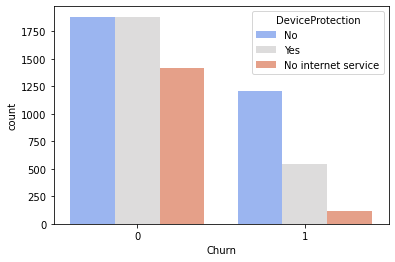

In [47]:
sns.countplot(df['Churn'], palette='coolwarm', hue='DeviceProtection', data=df)
plt.show()

Customers with no Device Protection have high churn.

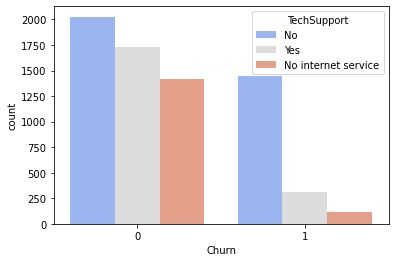

In [48]:
sns.countplot(df['Churn'], palette='coolwarm', hue='TechSupport', data=df)
plt.show()

Customers with no TechSupport have high churn.

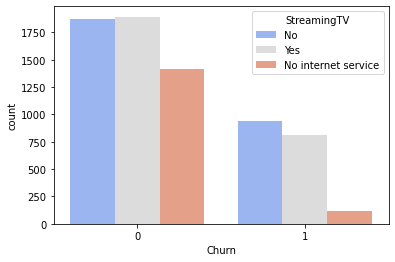

In [49]:
sns.countplot(df['Churn'], palette='coolwarm', hue='StreamingTV', data=df)
plt.show()

Customers who doesnt stream in TV have high churn.

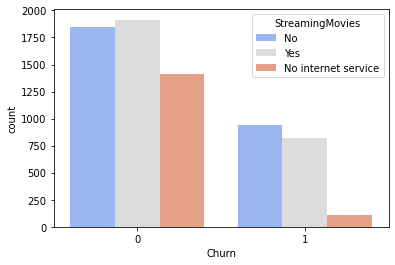

In [50]:
sns.countplot(df['Churn'], palette='coolwarm', hue='StreamingMovies', data=df)
plt.show()

Customers who doesnt stream Movies have high churn.

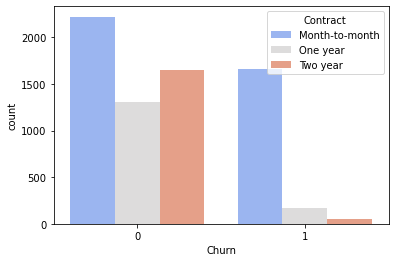

In [51]:
sns.countplot(df['Churn'], palette='coolwarm', hue='Contract', data=df)
plt.show()

Customers who have Month-to-Month contract have high churn.

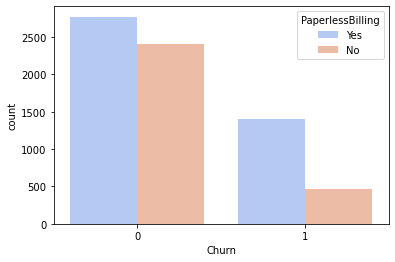

In [52]:
sns.countplot(df['Churn'], palette='coolwarm', hue='PaperlessBilling', data=df)
plt.show()

Customers with paperlessbilling have high churn.

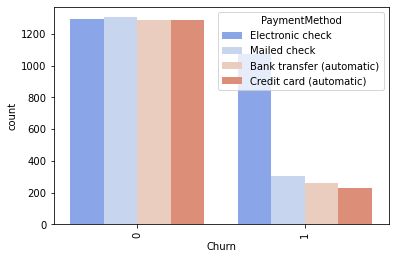

In [53]:
sns.countplot(df['Churn'], palette='coolwarm', hue='PaymentMethod', data=df)
plt.xticks(rotation=90)
plt.show()

Customers with Electronic check payment method have high churn.

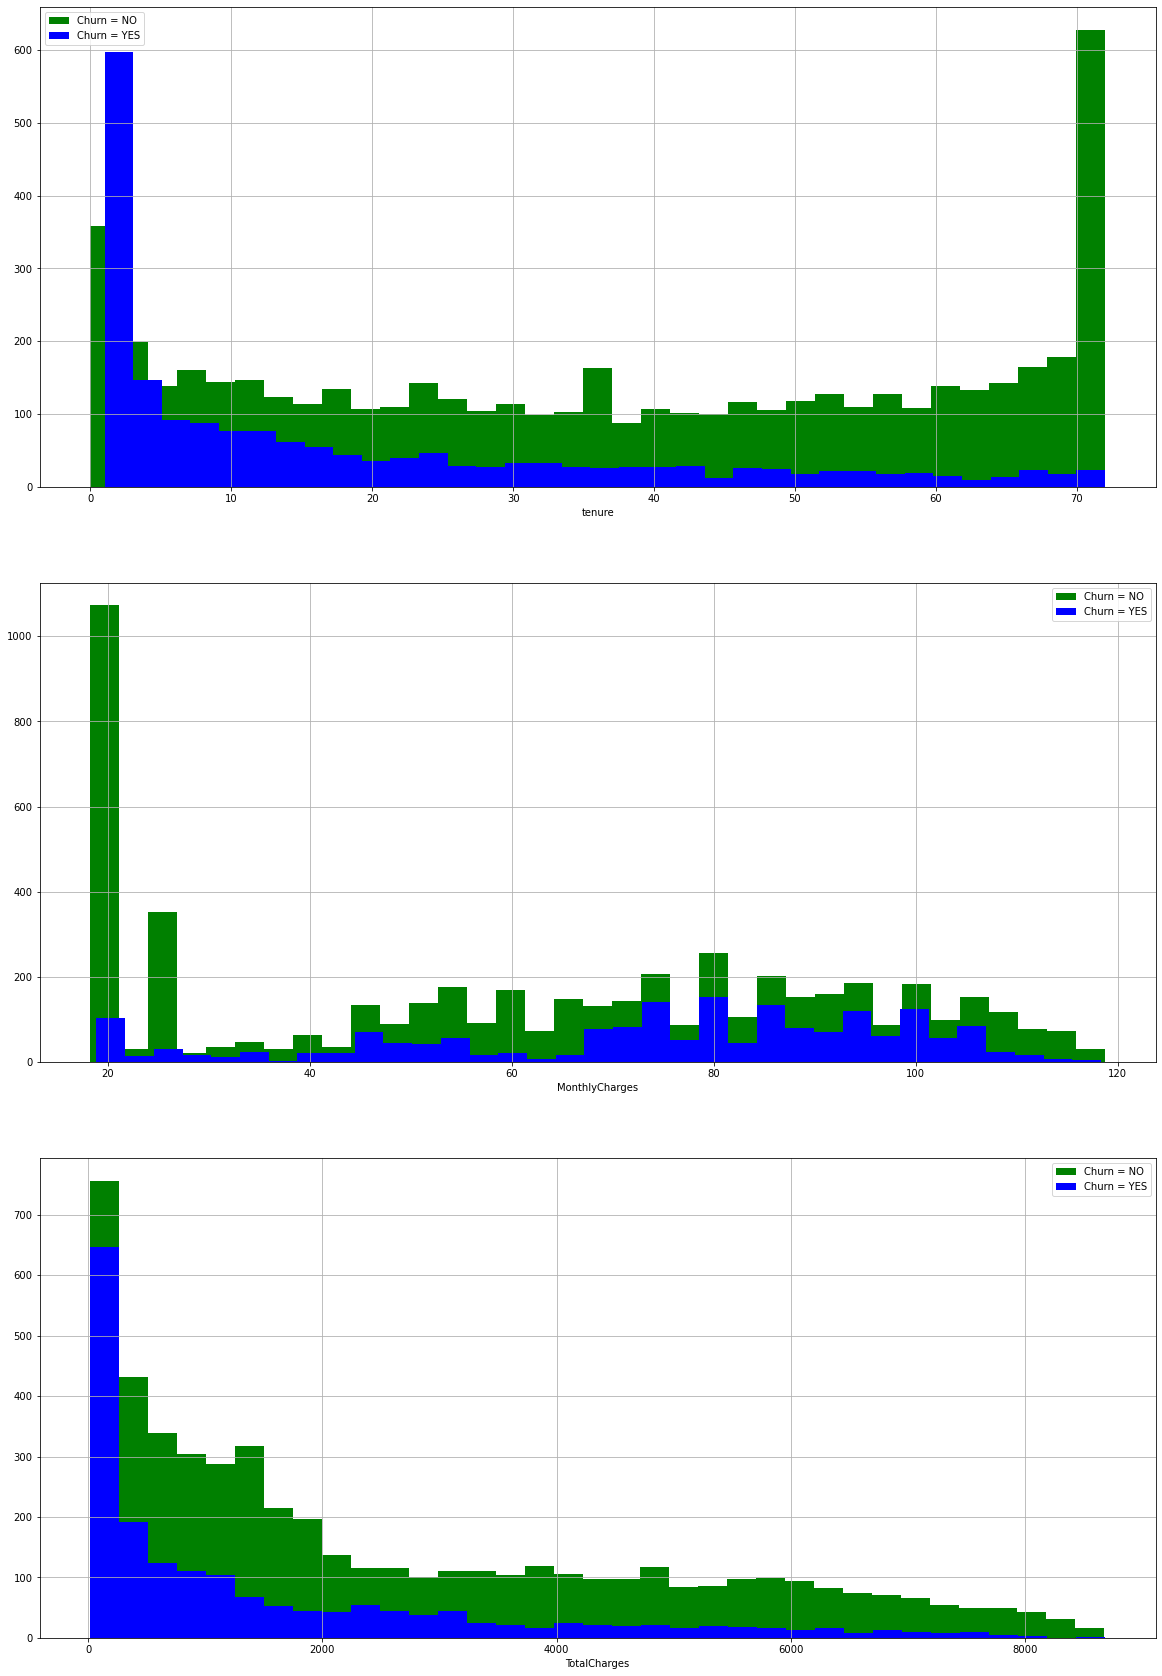

In [54]:
plt.figure(figsize=(20, 30))
df_cont=['tenure','MonthlyCharges', 'TotalCharges']
for i, column in enumerate(df_cont, 1):
    plt.subplot(3, 1, i)
    df[df["Churn"] == 0][column].hist(bins=35, color='green', label='Churn = NO', alpha=1)
    df[df["Churn"] == 1][column].hist(bins=35, color='blue', label='Churn = YES', alpha=1)
    plt.legend()
    plt.xlabel(column)

**Tenure:** Less tenure have high chances of churn.

**MonthlyCharges:** Monthly charges bewteen 55-110 have more chances of churn and less monthly charges have churn no.

**TotalCharges:** Both churn Yes and NO is high at less total charges.

## Dropping customer ID column

In [55]:
#we can drop cuustomer id column since it has all unique values and no use in predicting our target variable
df.drop('customerID',axis = 1,inplace = True)

In [56]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [57]:
#statistical summery
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [58]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102652,0.150889
tenure,0.016567,1.000000,0.247900,0.825464,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.650864,0.193356
TotalCharges,0.102652,0.825464,0.650864,1.000000,-0.199037
Churn,0.150889,-0.352229,0.193356,-0.199037,1.000000


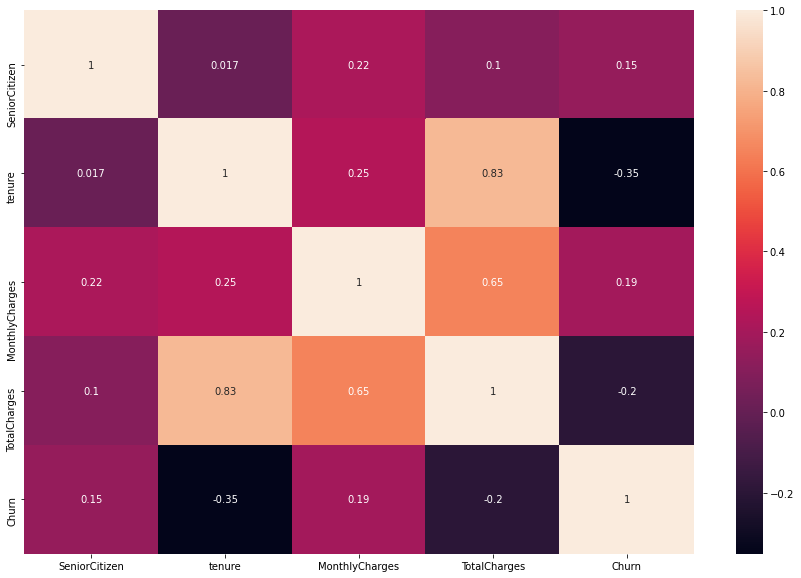

In [59]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data Preprocessing

### Encoding the Object Columns

In [60]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [61]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
#we can use ordinal encoding for gender,Dependents,Partner,PhoneService and PaperlessBilling columns.
#since they have only two unique values
from sklearn.preprocessing import OrdinalEncoder
collist = ['gender','Partner', 'Dependents','PhoneService', 'PaperlessBilling']
o_encoding = OrdinalEncoder()

for i in collist:
    if df[i].dtypes == 'object':
        df[i] = o_encoding.fit_transform(df[i].values.reshape(-1,1))

In [63]:
#For rest of the columns lets use get dummy method since all are nominal columns and more than 2 unique values
df_new = pd.get_dummies(data = df, columns = ['MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'])

In [64]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1.0,0.0,1,0.0,1.0,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1.0,0,0.0,0.0,34,1.0,0.0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1.0,0,0.0,0.0,2,1.0,1.0,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1.0,0,0.0,0.0,45,0.0,0.0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0.0,0,0.0,0.0,2,1.0,1.0,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


Encoding is Done for all the object columns, All the columns are now either Int or float

## Outlier Removal for Numerical Columns

In [65]:
#These are the only numerical columns in this dataset
Numerical_columns = ['tenure','MonthlyCharges', 'TotalCharges']

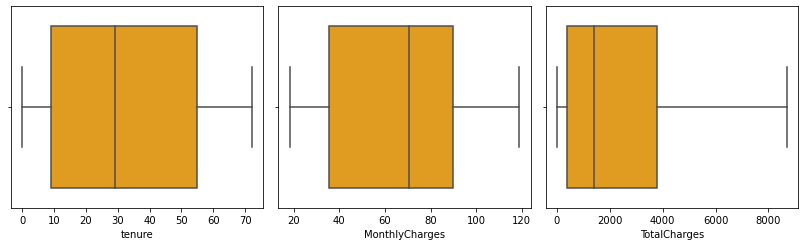

In [66]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 4
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

We can see there are no outliers in any of the numerical columns

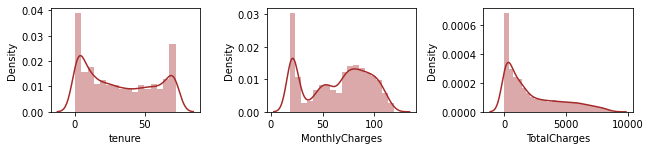

In [67]:
# Lets check the distribution
collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_new[collist[i]],color='brown')
    plt.tight_layout()

we can see that data is almost normal distributed for tenture and montlycharges, but right skewed for Total charges

## Skewness Reduction

In [68]:
#Lest check the skewness of these numerical columns
for i in Numerical_columns:
    print(i, df_new[i].skew())

tenure 0.2395397495619829
MonthlyCharges -0.22052443394398033
TotalCharges 0.9637890936414893


As we already saw, Total charges colums is Right skewed so the skewness is not in range

In [69]:
#lets use sqaureroot transformation method to reduce skewness of this column
df_new['TotalCharges']= np.sqrt(df_new['TotalCharges'])

In [70]:
#lets check the skewness
df_new['TotalCharges'].skew()

0.30983834186805154

We can see that skewness has been reduced

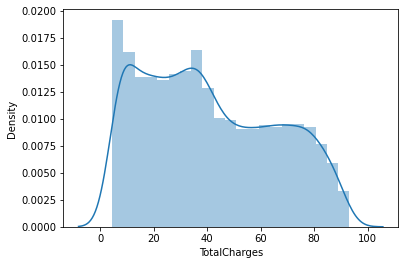

In [71]:
#lets check for distribution after skewness reduction
sns.distplot(df_new['TotalCharges'])
plt.show()

Data is almost normal distributed for this column now

## Splitting X and Y columns

In [72]:
#lets split our train and test data
y = df_new['Churn']
x = df_new.drop('Churn',axis = 1)

In [73]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

we can see the class imbalance problem

## Handling class Imbalance problem using SMOT method

In [74]:
#To install imbalanced-learn library use "pip install imbalanced-learn" command
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

Now our target column is balanced.

## Lets Check for Best Random State 

In [75]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=.22,random_state=i,stratify= y_sm)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"n Random_state",maxRS)

Best accuracy is 0.8572683355292051 n Random_state 51


In [76]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= 51, stratify= y_sm )

In [77]:
#now we don't have the class imbalance problem
y_train.value_counts()

1    4036
0    4035
Name: Churn, dtype: int64

## Model selection:

In [78]:
models=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

In [79]:
least_diffrence = []
for m in models:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x_sm,y_sm,cv =5)
    print("cross val score :",  cv.mean())
    difference = np.abs(accuracy_score(y_test,pred) - cv.mean())
    a = 'difference b/w accurancy score and cross val score is : {:.2f}'.format(difference)
    print(a)
    least_diffrence.append((m,a))
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))



LogisticRegression()
[[976 163]
 [162 976]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1139
           1       0.86      0.86      0.86      1138

    accuracy                           0.86      2277
   macro avg       0.86      0.86      0.86      2277
weighted avg       0.86      0.86      0.86      2277

The accuracy of LogisticRegression() is 0.8572683355292051
cross val score : 0.8292547217610785
difference b/w accurancy score and cross val score is : 0.03
f1 score for 0 is 0.8572683355292051 
f1 score for 1 is 0.8572683355292051 


SVC()
[[830 309]
 [227 911]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1139
           1       0.75      0.80      0.77      1138

    accuracy                           0.76      2277
   macro avg       0.77      0.76      0.76      2277
weighted avg       0.77      0.76      0.76      2277

The accuracy of SVC() is 0.764602547

In [80]:
#Lets check the least differnec between cross val score and Accuracy score
least_diffrence

[(LogisticRegression(),
  'difference b/w accurancy score and cross val score is : 0.03'),
 (SVC(), 'difference b/w accurancy score and cross val score is : 0.01'),
 (GaussianNB(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (DecisionTreeClassifier(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (KNeighborsClassifier(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (RandomForestClassifier(),
  'difference b/w accurancy score and cross val score is : 0.02'),
 (AdaBoostClassifier(),
  'difference b/w accurancy score and cross val score is : 0.02'),
 (GradientBoostingClassifier(),
  'difference b/w accurancy score and cross val score is : 0.03'),
 (BaggingClassifier(),
  'difference b/w accurancy score and cross val score is : 0.02')]

since **SVC,GaussianNB,DecisionTreeClassifier,KNeighborsClassifier**  is having diffrence of 0.00 which is very close,so there is no overfitting in this model.Lets choose model with most accuracy.**KNeighborsClassifier** is having hishest accurancy of 82%.so lets choose **KNeighborsClassifier** as our final model.

## Hyperparameter Tuning:

In [81]:
#lets create the parameter list to pass in GridsearchCv
KNN_parameters={'n_neighbors':np.arange(1, 16),
            'weights':('uniform', 'distance'),
            'algorithm':('auto','ball_tree','kd_tree','brute')}

In [82]:
KNN=GridSearchCV(KNeighborsClassifier(),KNN_parameters,cv=5)

In [83]:
KNN.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'weights': ('uniform', 'distance')})

In [84]:
KNN.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [85]:
KNN.best_score_

0.8347183506546818

## Creating a Final Model as KNeighborsClassifier

In [86]:
final_model = KNeighborsClassifier(algorithm='auto',n_neighbors=1,weights='uniform')
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
accu =accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy of {} is {}'.format(final_model,accu))
cv = cross_val_score(final_model,x_sm,y_sm,cv =5)
print('\n')
print("cross val score :",  cv.mean())
diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
least_diffrence.append((final_model,diffrence))
print('\n')
print('diffrence b/w accurancy score and cross val score is :',diffrence)
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))

[[ 862  277]
 [  72 1066]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1139
           1       0.79      0.94      0.86      1138

    accuracy                           0.85      2277
   macro avg       0.86      0.85      0.85      2277
weighted avg       0.86      0.85      0.85      2277

The accuracy of KNeighborsClassifier(n_neighbors=1) is 0.8467281510759772


cross val score : 0.8508908361994291


diffrence b/w accurancy score and cross val score is : 0.004162685123451859
f1 score for 0 is 0.8316449589966232 
f1 score for 1 is 0.8593309149536477 


Our final model is now created

F1 score for 0 is 83 and for 1 is 86, and also model is not overfitted.

## Saving the model:

In [87]:
#serialization using joblib
import joblib
joblib.dump(final_model,'Customer_Churn.obj')

['Customer_Churn.obj']

In [88]:
Customer_Churn = joblib.load('Customer_Churn.obj')

In [89]:
accuracy_score(Customer_Churn.predict(x_test),y_test)

0.8467281510759772

## AUC ROC curve :

In [90]:
#Since we have KNeighborsClassifier as our final , lets check out the auc roc curve and score

In [91]:
final_model.score(x_train,y_train)

0.9986370957749969

In [92]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]

In [93]:
#lets calculate fpr,tpr for plotting the roc-auc curve
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

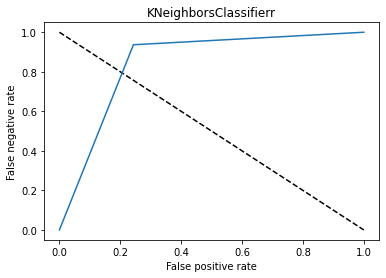

In [94]:
#Roc-AUC curve plot
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Decision Tree Classifer')
plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.title('KNeighborsClassifierr')
plt.show()

In [95]:
#Auc Roc curve is the graphical representation of confution matrix

In [96]:
#roc auc score
roc_auc_score(pred,y_test)

0.8583287759036067

We have roc_auc_score of 86%

## Conclusion

In [97]:
#lets make a dataframe of actual answers vs predicted answers
conclusion = pd.DataFrame((Customer_Churn.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021